# MLG Assingment 2

In [1]:
import pandas as pd
import numpy as np
import json

from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer


# Importing Data

In [2]:
with open("poland-bankruptcy-data-2009.json", "r") as read_file:
    data = json.load(read_file)


# Data preperation

In [3]:
dataframe = pd.DataFrame().from_dict(data['data'])
dataframe.head()

,company_id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
0,1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
1,2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
2,3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
3,5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
4,6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [4]:
dataframe.describe()

,company_id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
count,9977.000000,9977.000000,9977.000000,9977.000000,9960.000000,9.952000e+03,9977.000000,9977.000000,9964.000000,9974.000000,...,9.977000e+03,9935.000000,9977.000000,9948.000000,9977.000000,9.415000e+03,9961.00000,9.935000e+03,9960.000000,9765.000000
mean,5252.399419,0.052688,0.623634,0.088614,10.067323,-1.412557e+03,-0.124340,0.065407,16.757657,1.820532,...,6.771696e+03,-0.561651,-0.028476,3.976806,1.486227,5.938426e+02,13.62412,1.364510e+02,9.034435,36.291450
std,3030.164482,0.662816,6.590734,6.584543,537.128699,1.216712e+05,7.145680,0.666113,673.845491,7.771473,...,6.121491e+04,57.438557,19.134737,195.155108,79.262784,3.812344e+04,73.22837,2.666901e+04,31.773572,438.506192
min,1.000000,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.59030,-2.336500e+06,-0.000156,-0.000102
25%,2636.000000,0.000700,0.255280,0.016341,1.036150,-5.266650e+01,0.000000,0.002265,0.430778,1.011100,...,1.304300e+01,0.005136,0.007051,0.875850,0.000000,5.532000e+00,4.49120,4.101200e+01,3.049300,2.003100
50%,5259.000000,0.042731,0.465920,0.197570,1.600650,1.495950e+00,0.000000,0.050661,1.104150,1.197300,...,8.874800e+02,0.051546,0.106550,0.953130,0.003356,9.933700e+00,6.67050,7.093200e+01,5.116700,4.031400
75%,7875.000000,0.123140,0.690060,0.415680,2.950525,5.601725e+01,0.071759,0.141700,2.827425,2.044550,...,4.363300e+03,0.129640,0.271860,0.995923,0.249600,2.077800e+01,10.58400,1.187050e+02,8.846400,9.574000
max,10503.000000,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4246.70000,1.073500e+06,1974.500000,21499.000000


In [5]:
dataframe.isnull().sum()

company_id      0
feat_1          0
feat_2          0
feat_3          0
feat_4         17
             ... 
feat_61        16
feat_62        42
feat_63        17
feat_64       212
bankrupt        0
Length: 66, dtype: int64

Dropping Company_id

In [6]:
dataframe.drop('company_id', axis=1 )


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
0,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
1,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
2,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
3,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
4,0.182060,0.55615,0.321910,1.60450,16.3140,0.000000,0.182060,0.798080,1.81260,0.443850,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,0.359170,...,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646,True
9973,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,0.370110,...,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276,True
9974,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,0.160460,...,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659,True
9975,0.009423,0.50028,0.261630,1.52300,-10.1580,0.009423,0.007700,0.989900,1.01230,0.495230,...,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068,True


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 66 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company_id  9977 non-null   int64  
 1   feat_1      9977 non-null   float64
 2   feat_2      9977 non-null   float64
 3   feat_3      9977 non-null   float64
 4   feat_4      9960 non-null   float64
 5   feat_5      9952 non-null   float64
 6   feat_6      9977 non-null   float64
 7   feat_7      9977 non-null   float64
 8   feat_8      9964 non-null   float64
 9   feat_9      9974 non-null   float64
 10  feat_10     9977 non-null   float64
 11  feat_11     9977 non-null   float64
 12  feat_12     9960 non-null   float64
 13  feat_13     9935 non-null   float64
 14  feat_14     9977 non-null   float64
 15  feat_15     9970 non-null   float64
 16  feat_16     9964 non-null   float64
 17  feat_17     9964 non-null   float64
 18  feat_18     9977 non-null   float64
 19  feat_19     9935 non-null  

Splitting  the data

In [8]:
X = dataframe.iloc[:, :-1]
Y = dataframe.iloc[:, -1]
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split( X,Y,
    test_size=0.2, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (7981, 65)
y_train shape: (7981,)
X_test shape: (1996, 65)
y_test shape: (1996,)


Imputing data

In [16]:

X_train.replace('?',np.NaN,inplace=True )
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
idf=pd.DataFrame(imp.fit_transform(X_train))
idf.columns=X_train.columns
idf.index=X_train.index

In [17]:
print(X_train.isnull().sum())

company_id      0
feat_1          0
feat_2          0
feat_3          0
feat_4         14
             ... 
feat_60       459
feat_61        12
feat_62        33
feat_63        14
feat_64       171
Length: 65, dtype: int64


# Resampling 

Viewing imbalance of data first 

<Axes: >

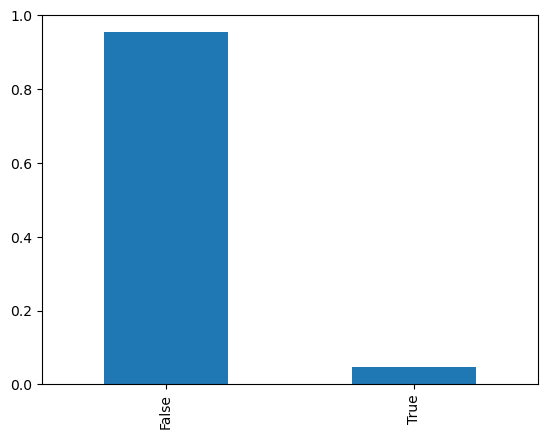

In [18]:
dataframe.bankrupt.value_counts(normalize=True).plot(kind='bar')

Resampling the data so there is more variance to make disicions by using the Random Over-Sampling method 

In [19]:
over_sampler = RandomOverSampler(random_state = 42)

X_train_over,y_train_over=over_sampler.fit_resample(X_train,Y_train)
print(X_train_over.isnull().sum())

company_id       0
feat_1           0
feat_2           0
feat_3           0
feat_4          35
              ... 
feat_60       1091
feat_61         33
feat_62         72
feat_63         35
feat_64        386
Length: 65, dtype: int64


Plotting data distribution

<Axes: >

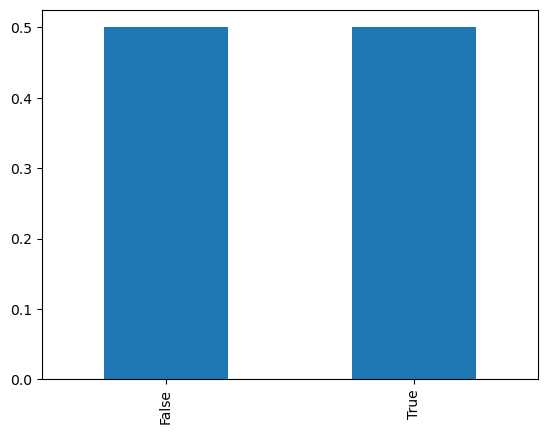

In [20]:
y_train_over.value_counts(normalize=True).plot(kind='bar')

# Hyperparameter tuning 

Building model

In [21]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_over, Y_train)

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
## Optimal Parameter search for the Model ##

# Parameters: "precision"  "recall" "support"

# Define the parameter grid

param_grid = {
 'n_estimators': [250,300],

 'learning_rate': [0.2, 0.4,0.6,0.8 ],

 'max_depth': [2 , 3 , 4,5 ]

}

# Create a GradientBoostingClassifier object

#gb_clf = GradientBoostingClassifier(random_state=42)


# Perform grid search cross-validation

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring="recall", n_jobs=-1)

grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score

print("Best parameters: ", grid_search.best_params_)

print("Best score: {:.2f}".format(grid_search.best_score_))

# Feature importance

# Reporting